In [2]:
import fsps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u 

plt.style.use('bmh')

In [3]:
#Leer archivo de los parámetros
df = pd.read_csv("andromeda.dat", usecols = (0,1), delim_whitespace = True)
df

,#Wavelength[Angstrom],Flux[Flux
0,3541.54,44.72435
1,3542.54,260.24350
2,3543.54,329.81950
3,3544.54,325.51480
4,3545.54,332.00990
...,...,...
3267,6808.54,1365.71600
3268,6809.54,1369.65600
3269,6810.54,1390.54800
3270,6811.54,1292.06000


In [4]:
long_ond_andro = np.asarray(df['#Wavelength[Angstrom]'])
flux_androm = np.asarray(df['Flux[Flux'])

In [5]:
# Crear una instancia del objeto FSPS
sp = fsps.StellarPopulation(zcontinuous=1, dust_type = 2, dust2 = 0.2)  # zcontinuous=1 para interpolación de metalicidad continua

# Configurar los parámetros para la población estelar de Andrómeda (valores ficticios)
age = 10.1  # edad en gigaaños

sp.params['logzsol'] = 0
sp.params['gas_logz'] = 0
sp.params['gas_logu'] = 0

# Obtener el espectro en el óptico (por ejemplo, en el rango de 4000 a 7000 Å)
wavelengths, spectrum = sp.get_spectrum(tage=age, peraa = False)

fsps.find_filter('sdss')
r_band = fsps.get_filter('sdss_r')
g_band = fsps.get_filter('sdss_g')
bands = [g_band, r_band]

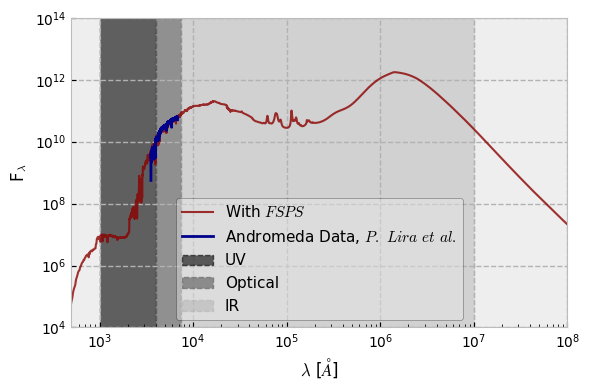

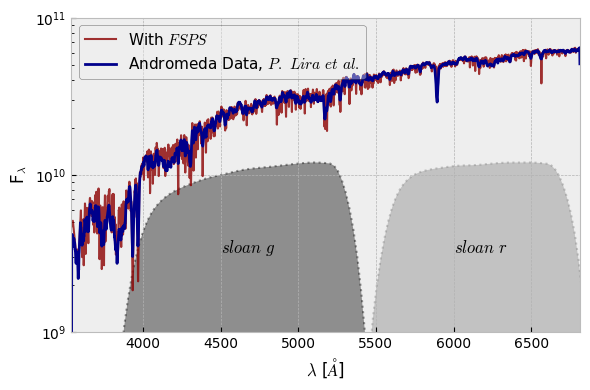

In [10]:
# Mostrar el espectro
plt.close()
colors = ['black', 'grey']
bandas = ['g', 'r']

fig1 = plt.figure(figsize = (6,4))
fig2 = plt.figure(figsize = (6,4))
ax1 = fig1.subplots()
ax2 = fig2.subplots()

ax = [ax1, ax2]

ax[0].plot(wavelengths, spectrum*(2.3e26), lw = 1.5, color = 'darkred', alpha = 0.8, label = 'With $FSPS$')
ax[0].set_ylabel(r'F$_{\lambda}$')
ax[0].set_xlabel(r'$\lambda$ [$\AA$]')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlim(500, 10**8)
ax[0].set_ylim(10**4, 10**14)

ax[0].plot(long_ond_andro, flux_androm*(long_ond_andro**2), color = 'darkblue', label = 'Andromeda Data, $P.$ $Lira$ $et$ $al.$')

ax[0].grid(lw = 1)
ax[0].axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax[0].axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax[0].axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')

ax[0].legend(fontsize=11, framealpha = 0.4, edgecolor = (0,0,0,1), loc = 'best')

fig1.tight_layout()
fig1.savefig(f'Images/Andromeda_fit_zoomout.png', dpi = 600)

#zoom in
ax[1].plot(wavelengths, spectrum*(2.3e26), lw = 1.5, color = 'darkred', alpha = 0.8, label = 'With $FSPS$')
ax[1].set_yscale('log')
ax[1].set_xlim(3540, 6813)
ax[1].set_ylim(10**9, 10**11)
ax[1].set_xlabel(r'$\lambda$ [$\AA$]')
ax[1].set_ylabel(r'F$_{\lambda}$')


ax[1].plot(long_ond_andro, flux_androm*(long_ond_andro**2), color = 'darkblue', label = 'Andromeda Data, $P.$ $Lira$ $et$ $al.$')

# plot filter transmission curves as shaded regions
for t,i in enumerate(bands):
    wavelength, transmission = i.transmission
    tmax = transmission.max()
    ax[1].fill_between(wavelength, (transmission / tmax * 0.8)*(1.5*10**10), alpha=0.4, color= colors[t], ls = ':', lw = 1.5)

ax[1].text(4500, 10**9.5, '$sloan$ $g$', fontsize = 12)
ax[1].text(6000, 10**9.5, '$sloan$ $r$', fontsize = 12)
ax[1].legend(fontsize=11, framealpha = 0.4, edgecolor = (0,0,0,1), loc = 'upper left')
fig2.tight_layout()
fig2.savefig(f'Images/Andromeda_fit_zoomin.png', dpi = 600)
plt.show()